<a href="https://colab.research.google.com/github/VaideswarReddy/Company_classification/blob/main/Team_5_Company_classification_Vaideswar_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Copy of data_company_classification.csv')

In [ ]:
df.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [ ]:
# df.columns

In [ ]:
df.fillna('null_value',inplace=True)

In [ ]:
# df.homepage_text[0]

In [ ]:
df.meta_keywords[0]

'electricians vero beach, vero beach electrical contractors, electric contractor, electrical contractor, lighting control, lighting solutions, florida electrical, business lighting, electrical contract,\n vero beach electric, commercial lighting control, electrician, Indian River County, Sebastian, Ft Pierce'

In [ ]:
df.meta_description[0]

'Providing quality, reliable full service residential and commercial electrical contractors service in Vero Beach Fl and Indian River County'

In [ ]:
df['complete_text'] = df['homepage_text']+df['meta_keywords']+df['meta_description']

In [ ]:
df['complete_text'][0]

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73974 non-null  object
 3   h1                73974 non-null  object
 4   h2                73974 non-null  object
 5   h3                73974 non-null  object
 6   nav_link_text     73974 non-null  object
 7   meta_keywords     73974 non-null  object
 8   meta_description  73974 non-null  object
 9   complete_text     73974 non-null  object
dtypes: object(10)
memory usage: 5.6+ MB


In [ ]:
df.columns

Index(['website', 'company_name', 'homepage_text', 'h1', 'h2', 'h3',
       'nav_link_text', 'meta_keywords', 'meta_description', 'complete_text'],
      dtype='object')

In [ ]:
df1 = df[['website','company_name','complete_text']]

In [ ]:
len(df['complete_text'])

73974

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   website        73974 non-null  object
 1   company_name   73974 non-null  object
 2   complete_text  73974 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df1.head()

,website,company_name,complete_text
0,bipelectric.com,bip dipietro electric inc,Electrici...
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...


In [ ]:
# texts = df1.complete_text[0]

In [ ]:
texts

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
import re

In [ ]:
def remove_urls_punctuations(text):
  text = re.sub(r"(?:\@|http?\://)\S+", "", text)
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  return text


In [ ]:
remove_urls_punctuations(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County Florida area for over fifteen years  Locally owned and operated Bip DiPietro Electric is dedicated to providing helpful reliable electrical service to residential commercial and retail clients alike  We are fully licensed and insured and our expert staff of electricians is ready to serve the Vero Beach area any time of the week day or night  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike We believe that the job needs to be done and it needs to be done right All of the employees here at Bip DiPietro Electric strive to give you our client exactly what your plans specify and install them the way that they are meant to be installed   Not only is electricity a necessity these days but it is also a technology that must be treated with caution and respect\xa0 All of the elec

In [ ]:
new_text

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County Florida area for over fifteen years  Locally owned and operated Bip DiPietro Electric is dedicated to providing helpful reliable electrical service to residential commercial and retail clients alike  We are fully licensed and insured and our expert staff of electricians is ready to serve the Vero Beach area any time of the week day or night  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike We believe that the job needs to be done and it needs to be done right All of the employees here at Bip DiPietro Electric strive to give you our client exactly what your plans specify and install them the way that they are meant to be installed   Not only is electricity a necessity these days but it is also a technology that must be treated with caution and respect\xa0 All of the elec

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(text):
  filtered_words = [word for word in text.split() if word not in stopwords.words('english')]
  return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
remove_stopwords(texts)

'Electricians electrical contractors serving Vero Beach FL Indian River County, Florida area fifteen years. Locally owned operated, Bip DiPietro Electric dedicated providing helpful, reliable electrical service residential, commercial retail clients alike. We fully licensed insured, expert staff electricians ready serve Vero Beach area time week, day night. Bip DiPietro Electric full service firm specializing areas Electrical Installation Commercial Residential buildings alike. We believe job needs done needs done right. All employees Bip DiPietro Electric strive give you, client, exactly plans specify install way meant installed. Not electricity necessity days, also technology must treated caution respect. All electricians Bip DiPietro Electric certified know means. No corners cut, items left out. The job done right way all. We would like thank taking time visit Web Site. Feel free look around site please contact us questions company services may provide you. Contact Bip DiPietro Elec

In [ ]:
text_stop

'Electricians electrical contractors serving Vero Beach FL Indian River County Florida area fifteen years Locally owned operated Bip DiPietro Electric dedicated providing helpful reliable electrical service residential commercial retail clients alike We fully licensed insured expert staff electricians ready serve Vero Beach area time week day night Bip DiPietro Electric full service firm specializing areas Electrical Installation Commercial Residential buildings alike We believe job needs done needs done right All employees Bip DiPietro Electric strive give client exactly plans specify install way meant installed Not electricity necessity days also technology must treated caution respect All electricians Bip DiPietro Electric certified know means No corners cut items left The job done right way We would like thank taking time visit Web Site Feel free look around site please contact us questions company services may provide Contact Bip DiPietro Electric Vero Beach Electrical Contractor 

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lemmitize_text(text):
  lem_words = []
  for words in text:
    lem_words.append(wnl.lemmatize(words))
  lem_sentence = ''
  for word in lem_words:
    lem_sentence +=  word

  return lem_sentence



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lemmitize_text(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
def remove_digits(text):
  for word in text:
    res = ''.join([i for i in text if not i.isdigit()])
  return res

  



In [ ]:
remove_digits(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
def text_clean(text):
  text = remove_urls_punctuations(text)
  text = remove_stopwords(text)
  # text = remove_digits(text)
  text = lemmitize_text(text)
  return text

In [ ]:
text_clean(texts)

'Electricians electrical contractors serving Vero Beach FL Indian River County Florida area fifteen years Locally owned operated Bip DiPietro Electric dedicated providing helpful reliable electrical service residential commercial retail clients alike We fully licensed insured expert staff electricians ready serve Vero Beach area time week day night Bip DiPietro Electric full service firm specializing areas Electrical Installation Commercial Residential buildings alike We believe job needs done needs done right All employees Bip DiPietro Electric strive give client exactly plans specify install way meant installed Not electricity necessity days also technology must treated caution respect All electricians Bip DiPietro Electric certified know means No corners cut items left The job done right way We would like thank taking time visit Web Site Feel free look around site please contact us questions company services may provide Contact Bip DiPietro Electric Vero Beach Electrical Contractor 

In [ ]:
df1.tail(10)

,website,company_name,complete_text
73964,snbeautybar.com,s&n beauty bar,CONTACT US Submit Thanks for ...
73965,otrbrewerydistrict.org,brewery district community urban redevelopment...,About Purpose History People O...
73966,kiwifoods.com,kiwi foods (i) pvt ltd,"801, 802, KLJ T..."
73967,nutristicks.com,"afterglow beverage company, inc.",Home Products About Me FAQ Contact ...
73968,patagoniafoods.com,patagonia foods,Tog...
73969,nayyarsons.com,nayyarsons food,"Nayyarsons, Deli, Bakery, Food Service..."
73970,claddaghcoffeecafe.com,claddagh coffee,Home About Us Our S...
73971,beautyologist.com.au,beautyologist,03 9531 5092 M...
73972,beautycall.co.uk,beauty call,...
73973,littleladyfoods.com,little lady foods,...


In [ ]:
df1['complete_text'] = df1['complete_text'].apply(text_clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Cleaned_data_company_classification.csv')

In [ ]:
df2

,website,company_name,complete_text
73964,snbeautybar.com,s&n beauty bar,CONTACT US Submit Thanks submitting Send S N ...
73965,otrbrewerydistrict.org,brewery district community urban redevelopment...,About Purpose History People Organization In N...
73966,kiwifoods.com,kiwi foods (i) pvt ltd,KLJ Tower Netaji Subhash Place Pitampura Del...
73967,nutristicks.com,"afterglow beverage company, inc.",Home Products About Me FAQ Contact Think types...
73968,patagoniafoods.com,patagonia foods,Toggle navigation Who We Are Quality Food Safe...
73969,nayyarsons.com,nayyarsons food,Nayyarsons Deli Bakery Food ServicesNayyarsons...
73970,claddaghcoffeecafe.com,claddagh coffee,Home About Us Our Shops West Seventh Wee Shop ...
73971,beautyologist.com.au,beautyologist,Make A Booking Beautyologist Beauty Salon S...
73972,beautycall.co.uk,beauty call,Enquire Get touch Gallery Prices Reviews Ar...
73973,littleladyfoods.com,little lady foods,What Our partners Why choose us Our family Con...


In [ ]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

lem_words = []
for words in filtered_words:
  lem_words.append(wnl.lemmatize(words))
    # print(wnl.lemmatize(words))


# lem_words = wnl.lemmatize(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lem_sentence = ''
for word in lem_words:
  lem_sentence +=  ' ' + word


In [ ]:
lem_sentence

' Electricians electrical contractor serving Vero Beach FL Indian River County Florida area fifteen year Locally owned operated Bip DiPietro Electric dedicated providing helpful reliable electrical service residential commercial retail client alike We fully licensed insured expert staff electrician ready serve Vero Beach area time week day night Bip DiPietro Electric full service firm specializing area Electrical Installation Commercial Residential building alike We believe job need done need done right All employee Bip DiPietro Electric strive give client exactly plan specify install way meant installed Not electricity necessity day also technology must treated caution respect All electrician Bip DiPietro Electric certified know mean No corner cut item left The job done right way We would like thank taking time visit Web Site Feel free look around site please contact u question company service may provide Contact Bip DiPietro Electric Vero Beach Electrical Contractor External Links Di

In [ ]:
lem_words

In [ ]:
filtered_words

In [ ]:
# remove_urls(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
# tokenizer = nltk.RegexpTokenizer(r"\w+")
# new_words = tokenizer.tokenize(texts)

In [ ]:
new_words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
filtered_words = [word for word in new_words if word not in stopwords.words('english')]

In [ ]:
filtered_words

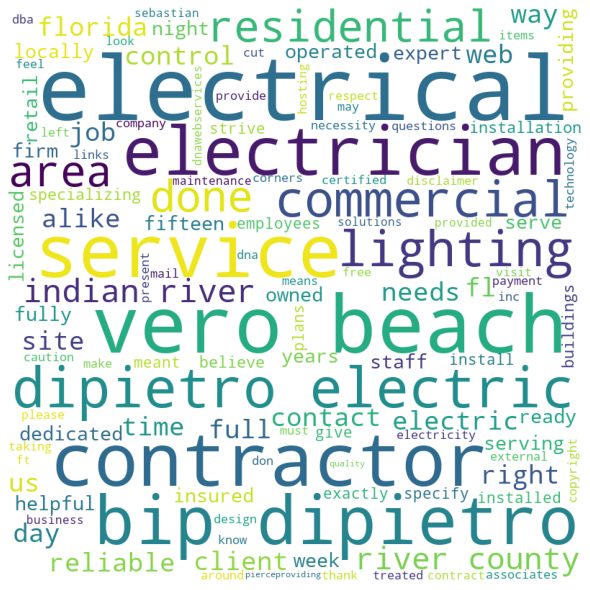

In [ ]:
words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in filtered_words:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()
for w in filtered_words:
    rootWord=ps.stem(w)
    print(rootWord)

In [ ]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

lem_words = []
for words in filtered_words:
  lem_words.append(wnl.lemmatize(words))
    # print(wnl.lemmatize(words))



# lem_words = wnl.lemmatize(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(len(lem_words))
# lem_words

215


In [ ]:
len(set(lem_words))

142

In [ ]:
words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in lem_words:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(lem_words)

In [ ]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features)

112
['2009', 'alike', 'area', 'associates', 'beach', 'believe', 'bip', 'building', 'business', 'caution', 'certified', 'client', 'commercial', 'company', 'contact', 'contract', 'contractor', 'control', 'copyright', 'corner', 'county', 'cut', 'day', 'dba', 'dedicated', 'design', 'dipietro', 'disclaimer', 'dna', 'dnawebservices', 'don', 'electric', 'electrical', 'electrician', 'electricians', 'electricity', 'employee', 'exactly', 'expert', 'external', 'feel', 'firm', 'fl', 'florida', 'free', 'ft', 'fully', 'helpful', 'hosting', 'indian', 'install', 'installation', 'installed', 'insured', 'item', 'job', 'know', 'left', 'licensed', 'lighting', 'like', 'links', 'locally', 'look', 'mail', 'maintenance', 'make', 'mean', 'meant', 'necessity', 'need', 'night', 'operated', 'owned', 'payment', 'pierceproviding', 'plan', 'present', 'provide', 'provided', 'providing', 'quality', 'question', 'ready', 'reliable', 'residential', 'respect', 'retail', 'right', 'river', 'sebastian', 'serve', 'service', '

In [ ]:
print(X)

  (0, 34)	1.0
  (1, 32)	1.0
  (2, 16)	1.0
  (3, 94)	1.0
  (4, 106)	1.0
  (5, 4)	1.0
  (6, 42)	1.0
  (7, 49)	1.0
  (8, 89)	1.0
  (9, 20)	1.0
  (10, 43)	1.0
  (11, 2)	1.0
  (13, 111)	1.0
  (14, 62)	1.0
  (15, 73)	1.0
  (16, 72)	1.0
  (17, 6)	1.0
  (18, 26)	1.0
  (19, 31)	1.0
  (20, 24)	1.0
  (21, 80)	1.0
  (22, 47)	1.0
  (23, 84)	1.0
  (24, 32)	1.0
  (25, 92)	1.0
  :	:
  (189, 31)	1.0
  (190, 12)	1.0
  (191, 59)	1.0
  (192, 17)	1.0
  (193, 33)	1.0
  (194, 49)	1.0
  (195, 89)	1.0
  (196, 20)	1.0
  (197, 90)	1.0
  (198, 45)	1.0
  (199, 75)	1.0
  (200, 81)	1.0
  (201, 84)	1.0
  (203, 92)	1.0
  (204, 85)	1.0
  (205, 12)	1.0
  (206, 32)	1.0
  (207, 16)	1.0
  (208, 92)	1.0
  (209, 106)	1.0
  (210, 4)	1.0
  (211, 42)	1.0
  (212, 49)	1.0
  (213, 89)	1.0
  (214, 20)	1.0


In [ ]:
 import nltk

In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokenizer.tokenize(text)

In [ ]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize(text)

In [ ]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
tokenizer.tokenize(text)

## Alternate work

In [ ]:
# Importing necessary libraries

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the data file
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Copy of data_company_classification.csv')

In [ ]:
# Verifying
df.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [ ]:
# Count of null values
df.isnull().sum()

website                 0
company_name            0
homepage_text         669
h1                  27321
h2                  20762
h3                  29315
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

In [ ]:
# Replacing null values
# df.fillna('and',inplace=True)

In [ ]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73974 non-null  object
 3   h1                73974 non-null  object
 4   h2                73974 non-null  object
 5   h3                73974 non-null  object
 6   nav_link_text     73974 non-null  object
 7   meta_keywords     73974 non-null  object
 8   meta_description  73974 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [ ]:
# Subsetting of the data

df1 = df[['company_name','meta_keywords','meta_description']]

In [ ]:
# Merging two coulums
df1['text'] = df1['meta_keywords'] + df1['meta_description']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      73974 non-null  object
 1   meta_keywords     23672 non-null  object
 2   meta_description  66886 non-null  object
 3   text              22610 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [ ]:
df2 = df1[~df1['text'].isnull()]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 73970
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      22610 non-null  object
 1   meta_keywords     22610 non-null  object
 2   meta_description  22610 non-null  object
 3   text              22610 non-null  object
dtypes: object(4)
memory usage: 883.2+ KB


In [ ]:
df2.head()

,company_name,meta_keywords,meta_description,text
0,bip dipietro electric inc,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid...","electricians vero beach, vero beach electrical..."
1,elias medical,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...,Elias Medical bakersfield ca family doctor med...
2,koops overhead doors,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,...","Koops Overhead Doors, Albany Garage Doors, Tro..."
5,wood green timber company limited,"wood, green, timber",Wood Green London Timber | Timber Merchants | ...,"wood, green, timberWood Green London Timber | ..."
6,houston chemical,"Chemicals, Drilling Fluids, Eco-Friendly, Envi...","Oilfield Chemicals - Production & Completion, ...","Chemicals, Drilling Fluids, Eco-Friendly, Envi..."


In [ ]:
df2.shape

(22610, 4)

In [ ]:
# Cleaning the data

# removing punctuations and Urls
def remove_urls_punctuations(text):
  text = re.sub(r"(?:\@|http?\://)\S+", "", text)
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  return text
# Removing stopwords

nltk.download('stopwords')
def remove_stopwords(text):
  filtered_words = [word for word in text.split() if word not in stopwords.words('english')]
  return ' '.join(filtered_words)

# Removing digits

def remove_digits(text):
  for word in text:
    return ''.join([i for i in text if not i.isdigit()])

# Lemmetization

nltk.download('wordnet')
wnl = WordNetLemmatizer()
# def lemmitize_text(text):
#   lem_words = []
#   for words in text:
#     lem_words.append(wnl.lemmatize(words))
#   lem_sentence = ''
#   for word in lem_words:
#     lem_sentence +=  word

#   return lem_sentence

def lem_text(text):
  l = [wnl.lemmatize(word) for word in text.split()]
  return " ".join(l)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_text(text):
  text1 = remove_urls_punctuations(text)
  text2 = remove_stopwords(text1)
  text3 = lem_text(text2)
  text4 = remove_digits(text3)
  
  return text4

In [ ]:
# Checking use case
df2['text'][9]

'UL Certified, brake metal, break metal fabrication, commercial sheet metal service, custom sheet metal fabrication, custom welding, gutter, gutter downspouts, residential sheet metalMetal Pride Inc. is a 50,000 square foot sheet metal fabrication facility located in Atlanta, GA.\xa0We offer Residential and Commercial sheet metal services.'

In [ ]:
# Checking use case
clean_text(df2['text'][9])

'UL Certified brake metal break metal fabrication commercial sheet metal service custom sheet metal fabrication custom welding gutter gutter downspouts residential sheet metalMetal Pride Inc  square foot sheet metal fabrication facility located Atlanta GA We offer Residential Commercial sheet metal service'

In [ ]:
# tokenizer = nltk.RegexpTokenizer(r"\w+")
# new_words = tokenizer.tokenize(df1['text'][9])

In [ ]:
df2['text'] = df2['text'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.text.values

array(['electrician vero beach vero beach electrical contractor electric contractor electrical contractor lighting control lighting solution florida electrical business lighting electrical contract vero beach electric commercial lighting control electrician Indian River County Sebastian Ft PierceProviding quality reliable full service residential commercial electrical contractor service Vero Beach Fl Indian River County',
       'Elias Medical bakersfield ca family doctor medicine Juvederm skin care Botox laser hair removal acne treatment restylane age spot photofacialFor best value Bakersfield skin care treatment medical doctor well compassionate family medicine care visit Elias Medical Havent tried Botox Restylane Photofacial Juvederm yet Now chance',
       'Koops Overhead Doors Albany Garage Doors Troy Garage Doors Capital District Garage Doors Clifton Park Garage Doors Capital District Garage Door Repair Albany Garage Door RepairKoops Overhead Doors specializes sale service repair

In [ ]:
# Saving the cleaned data file
df2.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Cleaned__part_company_classification.csv')

In [ ]:

df2 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Cleaned__part_company_classification.csv',index_col=0)

# Vectorization

In [ ]:
df2.head()

,company_name,meta_keywords,meta_description,text
0,bip dipietro electric inc,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid...",electrician vero beach vero beach electrical c...
1,elias medical,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...,Elias Medical bakersfield ca family doctor med...
2,koops overhead doors,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,...",Koops Overhead Doors Albany Garage Doors Troy ...
5,wood green timber company limited,"wood, green, timber",Wood Green London Timber | Timber Merchants | ...,wood green timberWood Green London Timber Timb...
6,houston chemical,"Chemicals, Drilling Fluids, Eco-Friendly, Envi...","Oilfield Chemicals - Production & Completion, ...",Chemicals Drilling Fluids EcoFriendly Environm...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 73970
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      22610 non-null  object
 1   meta_keywords     22610 non-null  object
 2   meta_description  22610 non-null  object
 3   text              22608 non-null  object
dtypes: object(4)
memory usage: 883.2+ KB


In [ ]:
df2 = df2[~df2['text'].isnull()]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22608 entries, 0 to 73970
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      22608 non-null  object
 1   meta_keywords     22608 non-null  object
 2   meta_description  22608 non-null  object
 3   text              22608 non-null  object
dtypes: object(4)
memory usage: 883.1+ KB


In [ ]:
# creating vectorizer 
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.03)

In [ ]:
X = vectorizer.fit_transform(df2['text'])

In [ ]:
words_list = vectorizer.get_feature_names()

In [ ]:
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
tf_idf.head()

,agency,area,based,best,business,call,care,city,client,commercial,company,construction,consulting,corporate,county,custom,customer,design,development,energy,equipment,estate,experience,family,financial,firm,food,free,full,group,health,help,high,home,hospital,inc,including,india,industrial,industry,...,online,our,personal,planning,product,professional,project,property,provide,provider,provides,providing,quality,range,real,repair,residential,sale,service,services,serving,small,software,solution,solutions,south,supply,support,system,technology,the,today,top,training,uk,we,web,website,work,year
0,0.0,0.000000,0.0,0.000000,0.194974,0.0,0.000000,0.0,0.0,0.458655,0.0,0.0,0.0,0.0,0.60661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.291139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249473,0.0,0.0,0.000000,0.298087,0.000000,0.305866,0.0,0.0,0.0,0.0,0.232888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.184349,0.000000,0.0,0.615295,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441597,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.344581,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.778599,0.000000,0.370266,0.198600,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# first 10 words with highest weight on document
tf_idf.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22568,22569,22570,22571,22572,22573,22574,22575,22576,22577,22578,22579,22580,22581,22582,22583,22584,22585,22586,22587,22588,22589,22590,22591,22592,22593,22594,22595,22596,22597,22598,22599,22600,22601,22602,22603,22604,22605,22606,22607
county,0.606610,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.777928,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
commercial,0.458655,0.0,0.0000,0.0,0.0,0.0,0.408938,0.958883,0.325664,0.0,0.0,0.417336,0.609761,0.0,0.0,0.00000,0.0,0.000000,0.0,0.628666,0.0,0.0,0.0,0.0,0.328026,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
service,0.305866,0.0,0.1986,0.0,0.0,0.0,0.272710,0.091351,0.000000,0.0,0.0,0.278311,0.000000,0.0,0.0,0.36983,0.0,0.257026,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.182321,0.249993,0.0,0.0,0.0,0.164999,0.098062,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.347221,0.211459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028997,0.0,0.0,0.0,0.347221,0.0,0.0,0.0,0.0,0.0,0.504715,0.0,0.0,0.0,0.0
residential,0.298087,0.0,0.0000,0.0,0.0,0.0,0.531549,0.000000,0.423308,0.0,0.0,0.000000,0.792585,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.426378,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
full,0.291139,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.448199,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(22608, 98)

In [ ]:
# X.shape

(22608, 110076)

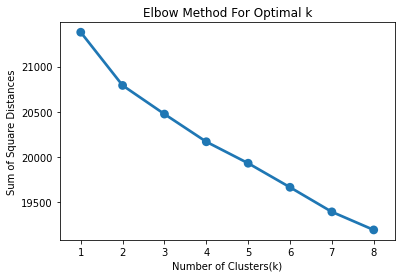

In [ ]:


from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,9):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

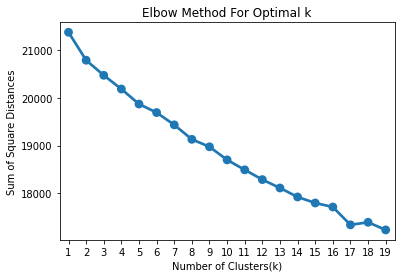

In [ ]:

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

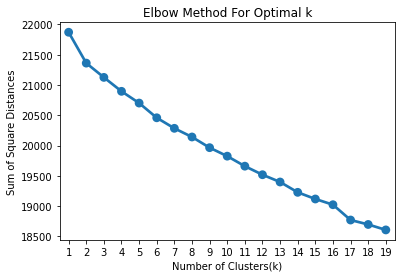

In [ ]:

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.031462687037995755
For n_clusters = 3 The average silhouette_score is : 0.03341975681974688
For n_clusters = 4 The average silhouette_score is : 0.03844658072203111
For n_clusters = 5 The average silhouette_score is : 0.043105815525804815
For n_clusters = 6 The average silhouette_score is : 0.050465619581993935
For n_clusters = 7 The average silhouette_score is : 0.05614150641484664
For n_clusters = 8 The average silhouette_score is : 0.05889092336396357
For n_clusters = 9 The average silhouette_score is : 0.06283043700512737
For n_clusters = 10 The average silhouette_score is : 0.06817764222974547


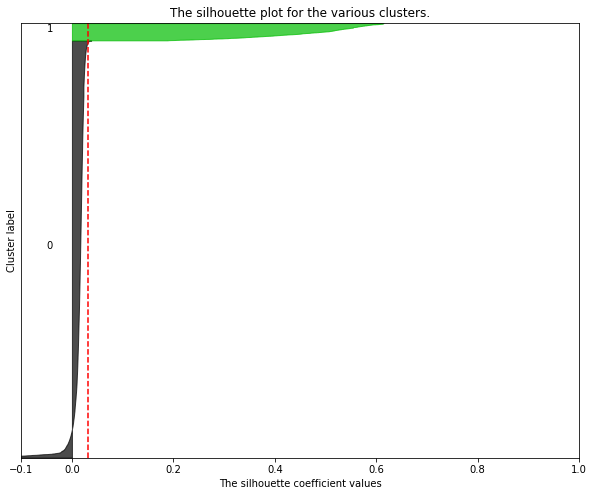

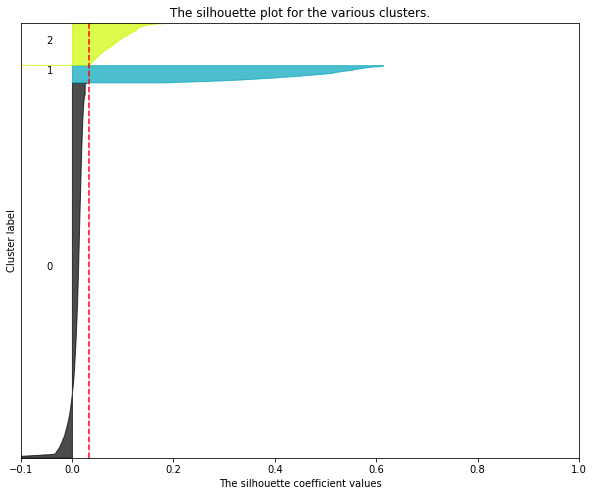

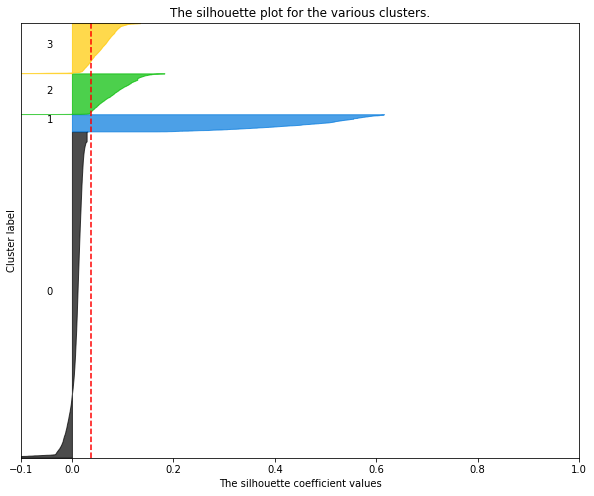

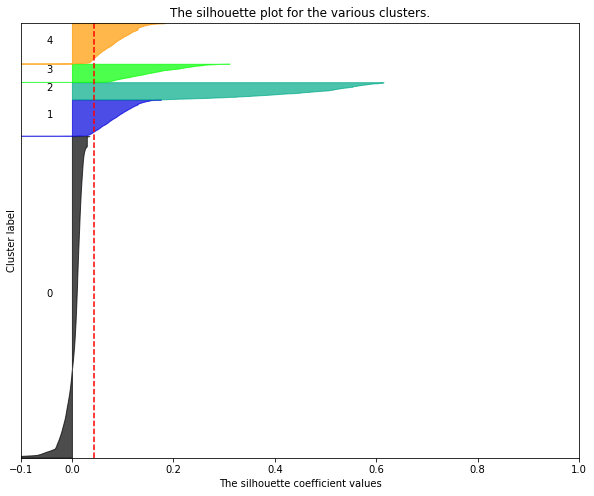

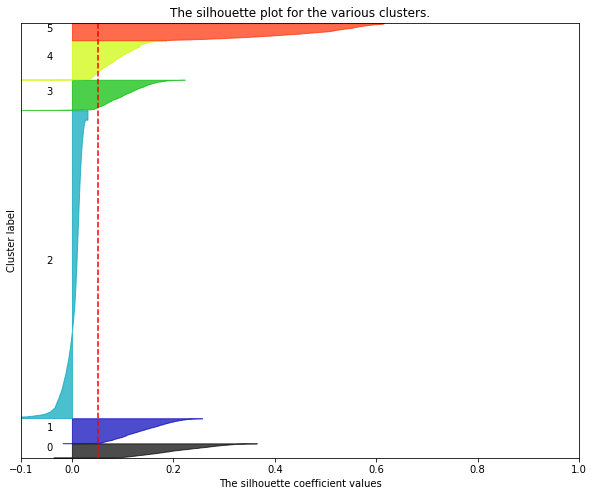

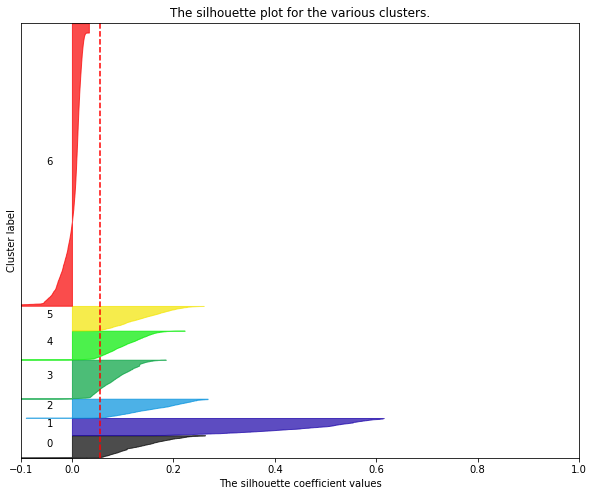

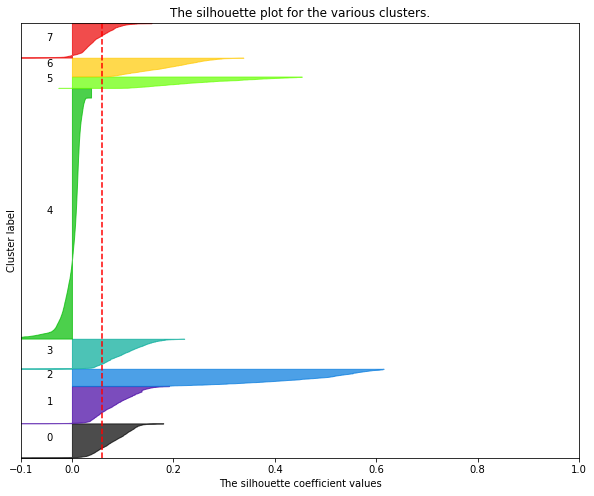

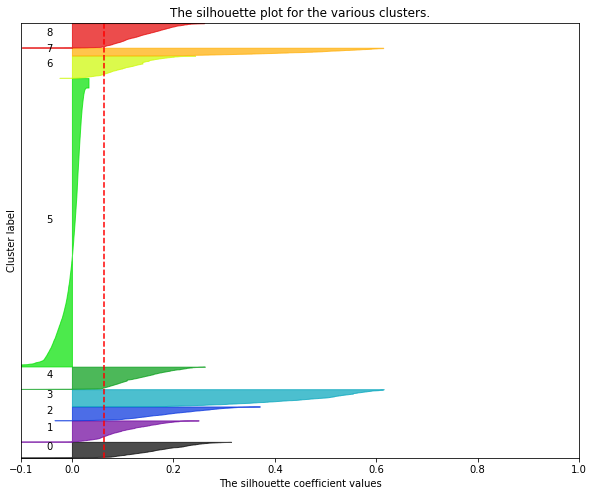

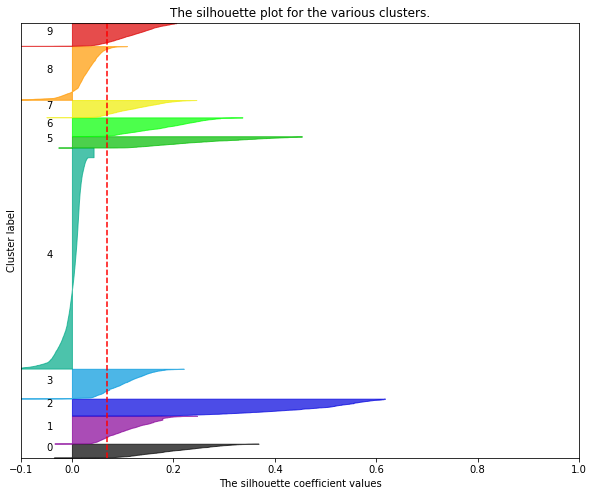

In [ ]:


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")
    # plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #               "with n_clusters = %d" % n_clusters),
    #              fontsize=14, fontweight='bold')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Use silhouette score
range_n_clusters = list (range(2,15))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(X)
    preds = clusterer.predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    print (f"For n_clusters = {n_clusters}, silhouette score is {score}")

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
For n_clusters = 2, silhouette score is 0.031462687037995755
For n_clusters = 3, silhouette score is 0.03387904044715754
For n_clusters = 4, silhouette score is 0.03988831101287865
For n_clusters = 5, silhouette score is 0.04522021029899583
For n_clusters = 6, silhouette score is 0.04719658699863931
For n_clusters = 7, silhouette score is 0.05140872295943508
For n_clusters = 8, silhouette score is 0.05699327959829478
For n_clusters = 9, silhouette score is 0.06094824902099311
For n_clusters = 10, silhouette score is 0.06543192972395434
For n_clusters = 11, silhouette score is 0.0713868070970651
For n_clusters = 12, silhouette score is 0.07312963994062588
For n_clusters = 13, silhouette score is 0.07837069844130273
For n_clusters = 14, silhouette score is 0.0813365363898504


In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
df2['Cluster'] = KMean_clust.labels_
df2.head(10)

,company_name,meta_keywords,meta_description,text,Cluster
0,bip dipietro electric inc,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid...",electrician vero beach vero beach electrical c...,3
1,elias medical,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...,Elias Medical bakersfield ca family doctor med...,2
2,koops overhead doors,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,...",Koops Overhead Doors Albany Garage Doors Troy ...,3
5,wood green timber company limited,"wood, green, timber",Wood Green London Timber | Timber Merchants | ...,wood green timberWood Green London Timber Timb...,2
6,houston chemical,"Chemicals, Drilling Fluids, Eco-Friendly, Envi...","Oilfield Chemicals - Production & Completion, ...",Chemicals Drilling Fluids EcoFriendly Environm...,2
8,pespisa company plumbing and heating,"high efficiency boiler,plumbing professionals,...","Plumbing, Heating, Ductless Air Conditioning, ...",high efficiency boilerplumbing professionalsai...,2
9,"metal pride, inc.","UL Certified, brake metal, break metal fabrica...","Metal Pride Inc. is a 50,000 square foot sheet...",UL Certified brake metal break metal fabricati...,3
16,durabond janitorial services,"commercial cleaning toronto, commercial cleani...","When you need commercial cleaning in Toronto, ...",commercial cleaning toronto commercial cleanin...,2
20,franklin electric company,"Magento, Varien, E-commerce",Franklin-Griffith offers electrical supplies a...,Magento Varien EcommerceFranklinGriffith offer...,2
29,oregon office solutions,"Copiers, Xerox Copiers, Office Equipment, Lase...","At Oregon Office Solutions, we pride ourselves...",Copiers Xerox Copiers Office Equipment Laser P...,2


In [ ]:
centroids = pd.DataFrame(KMean_clust.cluster_centers_)
centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97
0,0.000565,0.009163,0.012370,0.013154,0.027207,0.004918,0.001110,0.005566,0.010264,0.033797,0.059647,0.014600,0.021130,0.001259,0.005590,0.006241,0.015924,0.017584,0.023476,0.705594,0.018008,0.002588,0.009301,0.001239,0.003423,0.007113,0.002179,0.003665,0.006176,0.010303,0.001303,0.012759,0.011895,0.033456,0.000658,0.011403,0.006918,0.009864,0.016356,0.029291,...,0.001101,0.009599,0.000138,0.002833,0.020463,0.010621,0.035326,0.005207,0.013474,0.017634,0.017425,0.012472,0.010524,0.003280,0.002244,0.003023,0.018970,0.004517,0.040776,0.023213,0.006598,0.006315,0.004024,0.034915,0.013226,0.009604,0.012702,0.007087,0.056990,0.031593,0.007085,0.006751,0.004511,0.005023,0.017482,0.023219,0.000638,0.002247,0.009610,0.010929
1,0.073133,0.009515,0.003333,0.014461,0.076941,0.012325,0.010302,0.007688,0.009830,0.050656,0.018156,0.001236,0.003817,0.002993,0.006098,0.000768,0.011975,0.001067,0.000514,0.000879,0.001894,0.002983,0.005273,0.007169,0.029114,0.004319,0.001279,0.016255,0.005792,0.025614,0.058629,0.007341,0.001981,0.086477,0.000256,0.008005,0.004444,0.001126,0.000728,0.005350,...,0.015166,0.014875,0.032129,0.008033,0.008350,0.012343,0.000535,0.017818,0.008002,0.004964,0.007753,0.008404,0.002904,0.004361,0.003276,0.000708,0.000503,0.003107,0.025066,0.015628,0.006066,0.003361,0.001513,0.008361,0.004544,0.004668,0.000314,0.003060,0.001368,0.000251,0.006253,0.013423,0.002870,0.001350,0.002199,0.012551,0.000163,0.007643,0.005118,0.005941
2,0.016998,0.015165,0.018493,0.030577,0.038910,0.015224,0.026880,0.012215,0.010643,0.024617,0.044290,0.014985,0.020114,0.013962,0.014253,0.020118,0.010702,0.037138,0.026623,0.002126,0.024432,0.018358,0.013267,0.015326,0.017990,0.011614,0.028425,0.016062,0.006605,0.013191,0.017288,0.015559,0.015425,0.036657,0.023238,0.015164,0.009967,0.020942,0.020411,0.019733,...,0.023988,0.011854,0.007734,0.013739,0.030404,0.017467,0.012567,0.021875,0.011880,0.010254,0.014860,0.012462,0.023885,0.010213,0.017914,0.011081,0.011478,0.016876,0.017201,0.020526,0.012264,0.011567,0.029016,0.026791,0.016399,0.014167,0.019143,0.012482,0.022880,0.017290,0.017158,0.015497,0.010343,0.020319,0.015372,0.027551,0.027318,0.016955,0.011979,0.014998
3,0.012051,0.030007,0.019272,0.019866,0.047654,0.023556,0.015873,0.016327,0.016355,0.040196,0.064719,0.015025,0.025714,0.012071,0.014918,0.012872,0.030002,0.017930,0.007526,0.003201,0.022699,0.002880,0.013899,0.009569,0.015570,0.016229,0.011154,0.013855,0.042615,0.011779,0.008368,0.010138,0.013330,0.023955,0.011893,0.023036,0.018252,0.007018,0.019854,0.022312,...,0.016903,0.015731,0.009677,0.009914,0.018842,0.030306,0.009653,0.007728,0.030991,0.024573,0.036819,0.036928,0.028983,0.019418,0.002445,0.063521,0.016835,0.019536,0.369588,0.051149,0.014976,0.014153,0.006751,0.026703,0.020537,0.011815,0.016301,0.021088,0.017130,0.013398,0.006777,0.017988,0.006674,0.008733,0.013238,0.044124,0.006787,0.005707,0.011114,0.016669
4,0.003534,0.023713,0.009238,0.009361,0.064445,0.044929,0.009067,0.011967,0.040649,0.021578,0.006301,0.010574,0.005618,0.027492,0.022461,0.000000,0.000956,0.001120,0.003583,0.001820,0.000371,0.090621,0.011638,0.094053,0.004902,0.161172,0.000198,0.024364,0.006173,0.025714,0.005904,0.030785,0.005470,0.003617,0.000000,0.000797,0.013586,0.003986,0.001381,0.004642,...,0.004388,0.011570,0.084524,0.042582,0.003454,0.009392,0.000753,0.035665,0.011156,0.000000,0.013705,0.013522,0.004321,0.010133,0.043447,0.001135,0.003505,0.003131,0.035741,0.008289,0.017079,0.008697,0.002495,0.005984,0.003723,0.009967,0.001608,0.012883,0.001203,0.007052,0.026503,0.017280,0.006478,0.005542,0.003548,0.017039,0.000300,0.000313,0.015554,0.011235


In [ ]:
labels = KMean_clust.labels_

In [ ]:
from collections import Counter


In [ ]:
order_centroids = KMean_clust.cluster_centers_.argsort()

In [ ]:
order_centroids

array([[40, 60,  0, 42, 94, 34, 55, 58,  6, 23, 13, 30, 41, 50, 26, 72,
        95, 21, 61, 73, 71, 24, 27, 80, 46, 90, 75,  5, 91, 49, 65, 44,
         7, 14, 28, 15, 79, 78, 89, 36, 51, 88, 85, 25, 48,  1, 57, 22,
        59, 83, 96, 37, 45,  8, 29, 70, 63, 97, 35, 54, 32,  2, 69, 84,
        31,  3, 82, 66, 53, 11, 16, 38, 52, 68, 92, 17, 67, 20, 74, 43,
        62, 12, 77, 93, 18,  4, 39, 47, 87, 33,  9, 81, 64, 76, 86, 10,
        56, 19],
       [48, 94, 87, 34, 84, 74, 18, 64, 41, 73, 38, 15, 56, 19, 17, 37,
        11, 26, 91, 86, 42, 80, 20, 32, 92, 90, 70, 21, 13, 85, 75, 72,
         2, 49, 79, 53, 12, 43, 25, 71, 36, 82, 83, 57, 67, 96, 22, 39,
        28, 97, 78, 14, 88, 55, 46, 23, 31, 95,  7, 68, 66, 35, 61, 50,
        62, 81, 69,  1,  8,  6, 45, 52, 16, 54,  5, 63, 93, 47, 89,  3,
        59, 58, 77, 27, 51, 65, 10, 76, 29, 24, 60,  9, 30,  0,  4, 33,
        44, 40],
       [42, 19, 40, 28, 44, 60, 36, 71, 67, 90,  8, 16, 73, 74, 79, 25,
        59, 66, 96,  7, 78, 69

In [ ]:
from wordcloud import WordCloud

In [ ]:
centroids = KMean_clust.cluster_centers_.argsort()

word_1 = [words_list[i] for i in order_centroids[0, :]]
word_count = Counter(word_1)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(word_1)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

TypeError: ignored

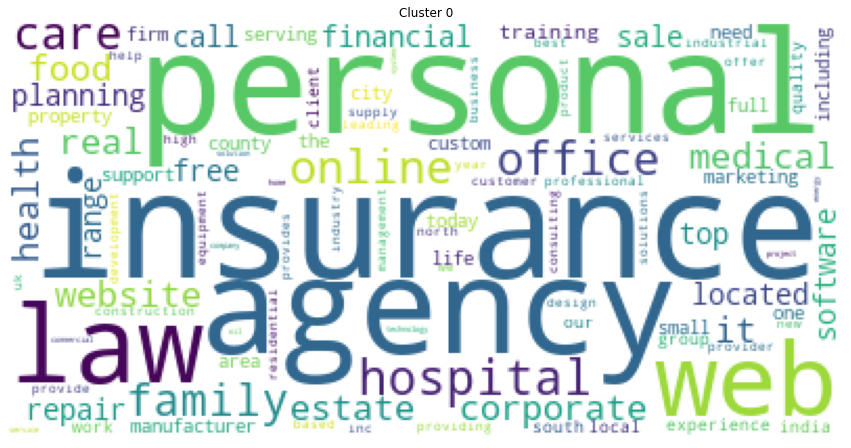

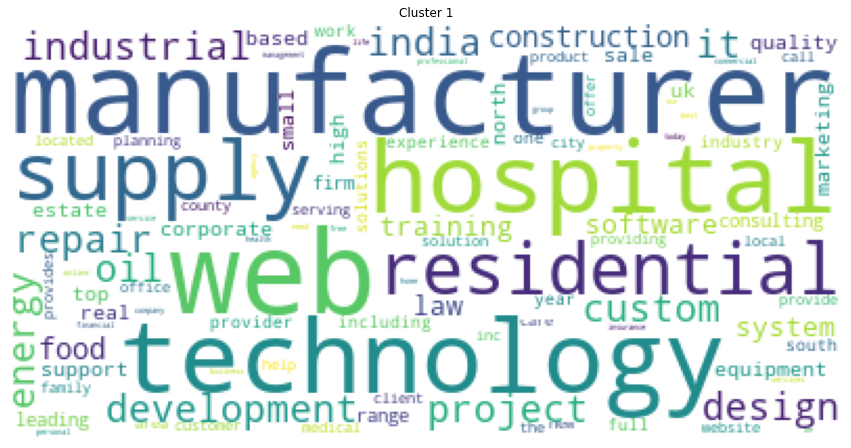

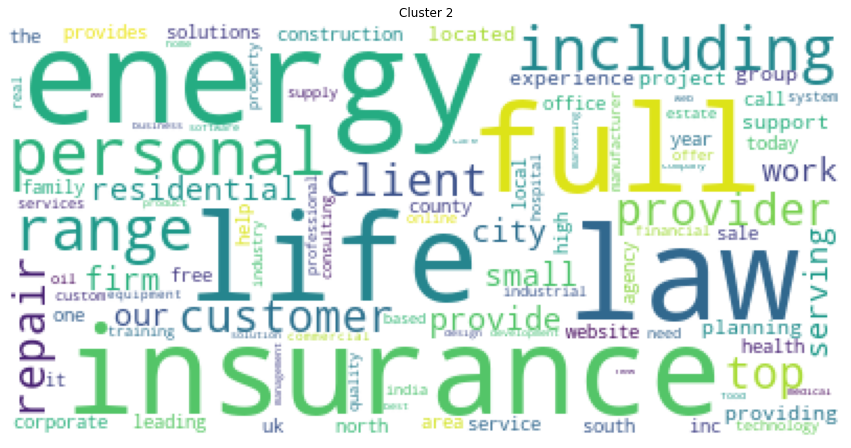

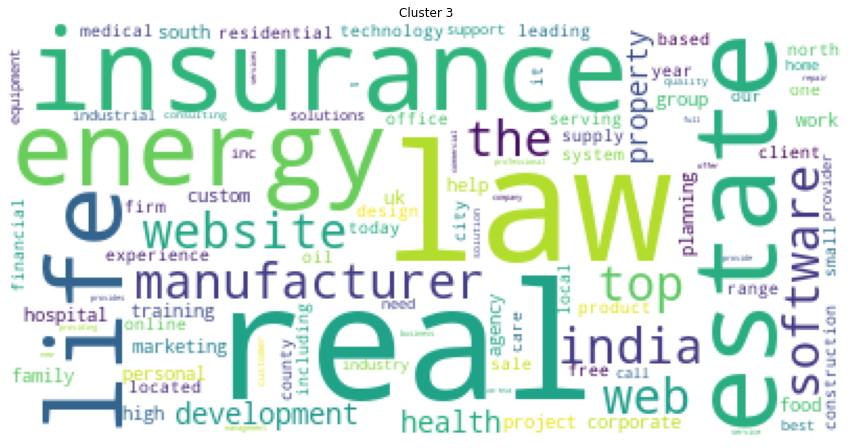

In [ ]:
# order_centroids = KMean_clust.cluster_centers_.argsort()[:, ::-1]
for i in range(4):
    words = [words_list[ind] for ind in order_centroids[i, :]]
    words_ = Counter(words)
    # print("Cluster {}: {}".format(i, ' '.join(words)))
    # print(f'words in cluster {i} are {words}')
    # print(f'Length of words in cluster {i} is {len(words)}')
    
    wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(words_)
    # plt.imshow(wordcloud)
    plt.figure(figsize = (15,15))
    plt.title('Cluster {}'.format(i))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in filtered_words:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()